In [1]:
import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import add_path
from toolkit.paths import paths
from toolkit.pipeline.global_settings import GLOBAL_SETTINGS
from toolkit.pipeline.data_io import SessionDirectory
from toolkit.allen_helpers.location import StructureFinder

pd.set_option('display.max_columns', None)

In [2]:
ecephys_structure_acronym = GLOBAL_SETTINGS['ecephys_structure_acronym']

data_dir = paths.PROCESSED_DATA_CACHE_DIR / ecephys_structure_acronym
session_list = [f.name for f in data_dir.iterdir() if f.is_dir()]

In [3]:
probe_infos = []
lfp_channels = []

for session_id in session_list:
    session_dir = SessionDirectory(session_id, ecephys_structure_acronym)
    probe_info = session_dir.load_probe_info()
    if not session_dir.has_lfp_data or not probe_info['central_channels']:
        continue
    lfp_channels.append(session_dir.load_lfp_channels())

In [4]:
sf = StructureFinder(paths.REFERENCE_SPACE_CACHE_DIR, structure_acronym=ecephys_structure_acronym)

layers = np.array(list(sf.layer_acronym_map.values()))

colors = plt.get_cmap('plasma', layers.size)(np.linspace(0, 1, layers.size))

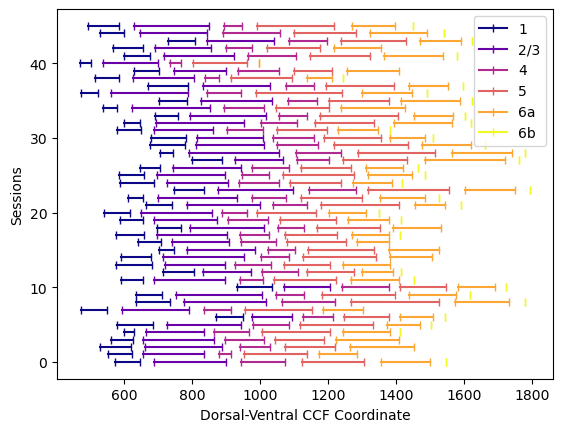

In [5]:
_, ax = plt.subplots(1, 1)

for i, lfp_channel in enumerate(lfp_channels):
    for j, layer in enumerate(layers):
        idx = lfp_channel['layer_acronym'] == layer
        if not any(idx):
            continue
        dv_ccf = lfp_channel.loc[idx, 'dorsal_ventral_ccf_coordinate'].values
        channel_range = dv_ccf[[0, -1]]
        ax.plot(channel_range, [i, i], color=colors[j], marker='|', label=layer)
ax.set_xlabel('Dorsal-Ventral CCF Coordinate')
ax.set_ylabel('Sessions')
ax.legend(layers)
plt.show()

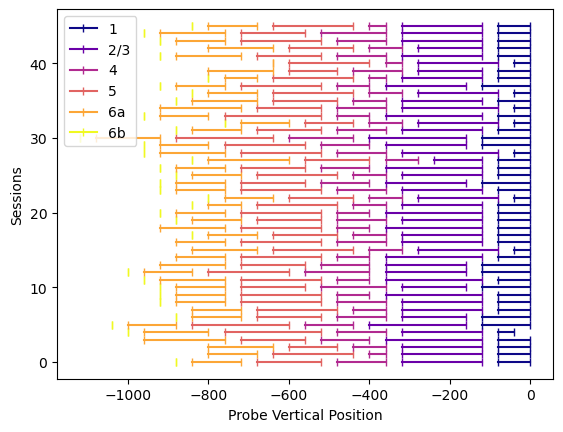

In [6]:
_, ax = plt.subplots(1, 1)

for i, lfp_channel in enumerate(lfp_channels):
    vertical_position = lfp_channel['probe_vertical_position'].values
    vertical_position = vertical_position - vertical_position[-1]
    for j, layer in enumerate(layers):
        idx = lfp_channel['layer_acronym'] == layer
        if not any(idx):
            continue
        vp = vertical_position[idx]
        channel_range = vp[[0, -1]]
        ax.plot(channel_range, [i, i], color=colors[j], marker='|', label=layer)
ax.set_xlabel('Probe Vertical Position')
ax.set_ylabel('Sessions')
ax.legend(layers)
plt.show()

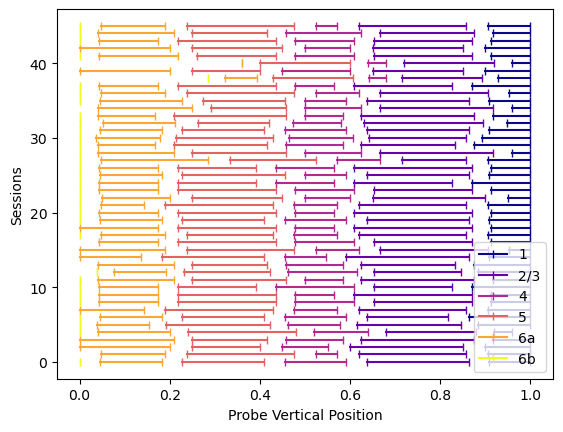

In [7]:
_, ax = plt.subplots(1, 1)

for i, lfp_channel in enumerate(lfp_channels):
    vertical_position = lfp_channel['probe_vertical_position'].values
    vertical_position_portion = (vertical_position - vertical_position[0]) / (vertical_position[-1] - vertical_position[0])
    for j, layer in enumerate(layers):
        idx = lfp_channel['layer_acronym'] == layer
        if not any(idx):
            continue
        vp = vertical_position_portion[idx]
        channel_range = vp[[0, -1]]
        ax.plot(channel_range, [i, i], color=colors[j], marker='|', label=layer)
ax.set_xlabel('Probe Vertical Position')
ax.set_ylabel('Sessions')
ax.legend(layers)
plt.show()